1. State - Indian state for which record exists
2. District - District of specific Indian state in record
3. Crop - Crop for which production is recorded
4. Year - Year of specific record
5. Season - Agriculture season. There are many agriculture seasons in India.
6. Production Units - Tonnes (measurement 100 KG = 1 Ton)
7. Yeild - Crop yields are the harvested production per unit of harvested area for crop products.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries

In [ ]:
# Data Analysis & Calculation
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Import label encoder 
from sklearn import preprocessing
# for calculating Z-Score
import scipy.stats as stats
# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Accuracy : r2
from sklearn.metrics import r2_score



## Loading DataSet

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projects/DataSets/India Agriculture Crop Production.csv')

In [ ]:
data

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
344203,Manipur,IMPHAL WEST,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
344204,Manipur,SENAPATI,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
344205,Manipur,TAMENGLONG,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
344206,Manipur,THOUBAL,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN


In [ ]:
# Checking Shape of dataset
data.shape

(344208, 10)

In [ ]:
# Checking size of dataset
data.size

3442080

In [ ]:
# checking for null values
data.isnull().sum()

State                  0
District               0
Crop                 109
Year                   0
Season                 0
Area                 109
Area Units             0
Production          5021
Production Units       0
Yield                109
dtype: int64

- Crop, Area Production and Yield contains null values 

In [ ]:
# understanding column names
data.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [ ]:
# checking data types of columns
data.dtypes

State                object
District             object
Crop                 object
Year                 object
Season               object
Area                float64
Area Units           object
Production          float64
Production Units     object
Yield               float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344208 entries, 0 to 344207
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             344208 non-null  object 
 1   District          344208 non-null  object 
 2   Crop              344099 non-null  object 
 3   Year              344208 non-null  object 
 4   Season            344208 non-null  object 
 5   Area              344099 non-null  float64
 6   Area Units        344208 non-null  object 
 7   Production        339187 non-null  float64
 8   Production Units  344208 non-null  object 
 9   Yield             344099 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.3+ MB


- only 3 columns contain numerical data (Area, Production and Yield) rest are categorical columns

In [ ]:
# Getting statistical information of numerical columns of a dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,344099.0,11694.401244,4.589432e+04,0.004,75.000000,536.0,4133.000000,8.580100e+06
Production,339187.0,961757.793407,2.156868e+07,0.000,88.000000,721.0,7208.000000,1.597800e+09
Yield,344099.0,79.687192,9.183136e+02,0.000,0.548261,1.0,2.469699,4.395833e+04


## Checking Unique entries and their occurance for all the Categorical Columns

In [ ]:
data.head(3)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358


#### State

In [ ]:
data['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Telangana'], dtype=object)

In [ ]:
data['State'].value_counts()

Uttar Pradesh                  44781
Madhya Pradesh                 29906
Karnataka                      27493
Bihar                          24697
Rajasthan                      20363
Tamil Nadu                     18525
Assam                          18186
Maharashtra                    17922
Andhra Pradesh                 16363
Odisha                         16153
Chhattisgarh                   14410
Gujarat                        14053
West Bengal                    12596
Haryana                         8305
Uttarakhand                     6383
Nagaland                        5676
Himachal Pradesh                5043
Jharkhand                       5004
Kerala                          4870
Telangana                       4684
Jammu and Kashmir               4349
Arunachal Pradesh               4345
Meghalaya                       4322
Punjab                          4142
Manipur                         3120
Tripura                         2557
Mizoram                         2112
P

#### District

In [ ]:
data['District'].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'EAST GODAVARI', 'KRISHNA', 'VIZIANAGARAM',
       'WEST GODAVARI', 'ADILABAD', 'CHITTOOR', 'GUNTUR', 'KADAPA',
       'KARIMNAGAR', 'KHAMMAM', 'KURNOOL', 'MAHBUBNAGAR', 'MEDAK',
       'NALGONDA', 'NIZAMABAD', 'PRAKASAM', 'RANGAREDDI', 'SPSR NELLORE',
       'SRIKAKULAM', 'VISAKHAPATANAM', 'WARANGAL', 'CHANGLANG',
       'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG', 'KURUNG KUMEY',
       'LOHIT', 'LOWER DIBANG VALLEY', 'LOWER SUBANSIRI', 'PAPUM PARE',
       'TAWANG', 'TIRAP', 'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG',
       'WEST SIANG', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON', 'NAGAON',
       'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA', 'ARARIA', 'ARWAL',
       'AURANGABAD', 'BANKA', 'BEGUS

In [ ]:
data['District'].value_counts()

BIJAPUR                    1255
BILASPUR                   1212
BELGAUM                    1197
TUMKUR                     1175
AURANGABAD                 1164
                           ... 
CHARAIDEO                     2
BISWANATH                     2
MUMBAI SUBURBAN               2
SOUTH SALMARA MANCACHAR       1
MUMBAI                        1
Name: District, Length: 709, dtype: int64

**Top 5 Distict for agriculture: BIJAPUR, BILASPUR, BELGAUM, TUMKUR, AURANGABAD**

#### Crop

In [ ]:
data['Crop'].unique()

array(['Arecanut', 'Banana', 'Black pepper', 'Cashewnut', 'Coconut',
       'Dry chillies', 'Ginger', 'Other Kharif pulses', 'other oilseeds',
       'Rice', 'Sugarcane', 'Sweet potato', 'Arhar/Tur', 'Bajra',
       'Castor seed', 'Coriander', 'Cotton(lint)', 'Gram', 'Groundnut',
       'Horse-gram', 'Jowar', 'Linseed', 'Maize', 'Mesta',
       'Moong(Green Gram)', 'Niger seed', 'Onion', 'Other Rabi pulses',
       'Potato', 'Ragi', 'Rapeseed &Mustard', 'Safflower', 'Sesamum',
       'Small millets', 'Soyabean', 'Sunflower', 'Tapioca', 'Tobacco',
       'Turmeric', 'Urad', 'Wheat', 'Oilseeds total', 'Jute', 'Masoor',
       'Peas & beans (Pulses)', 'Barley', 'Garlic', 'Khesari', 'Sannhamp',
       'Guar seed', 'Moth', 'Cardamom', 'Other Cereals', 'Cowpea(Lobia)',
       'Dry Ginger', 'Other Summer Pulses', nan], dtype=object)

In [ ]:
data['Crop'].value_counts()

Rice                     21567
Maize                    20462
Moong(Green Gram)        15040
Urad                     14512
Sesamum                  13009
Groundnut                12555
Wheat                    11208
Rapeseed &Mustard        10993
Sugarcane                10913
Arhar/Tur                10857
Potato                   10694
Onion                    10637
Gram                     10436
Jowar                     9746
Dry chillies              8943
Bajra                     7786
Peas & beans (Pulses)     7226
Sunflower                 7226
Small millets             6947
Cotton(lint)              6468
Masoor                    6347
Turmeric                  5915
Barley                    5867
Linseed                   5866
Ragi                      5732
Sweet potato              5719
Other Kharif pulses       5680
Horse-gram                5379
Coriander                 5010
Garlic                    5007
Soyabean                  4962
Other Rabi pulses         4837
Castor s

**5 Most common choice for Agriculture in India are:
 Rice, Maize, Moong(Green Gram), Urad, Sesamum**

#### Season

In [ ]:
data['Season'].unique()

array(['Kharif', 'Whole Year', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [ ]:
data['Season'].value_counts()

Kharif        137895
Rabi          100591
Whole Year     68399
Summer         22084
Winter          8250
Autumn          6989
Name: Season, dtype: int64

**Kharif is the most prefered season for agriculture**

#### Area Unit

In [ ]:
data['Area Units'].unique()

array(['Hectare'], dtype=object)

#### Production Unit

In [ ]:
data['Production Units'].unique()

array(['Tonnes', 'Nuts', 'Bales'], dtype=object)

In [ ]:
data['Production Units'].value_counts()

Tonnes    330514
Bales      10769
Nuts        2925
Name: Production Units, dtype: int64

**Majoritily Crop is measured in Tonnes**

In [ ]:
# Convering Production units(Bales and Nuts) into Tones 

def punit(data):
    
    if data["Production Units"] == "Nuts":
        new_production_unit= data["Production"] / 50 
        return new_production_unit
        
    elif data["Production Units"] == "Tonnes":
        return data["Production"]
    
    else:
        new_production_unit = data["Production"] / 4.59
        return new_production_unit

        
data["New_Production_Unit"] = data.apply(punit, axis = 1)
data.head(3)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,New_Production_Unit
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,2061.0
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803,2083.0
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358,1525.0


- Droping original Production and Production Unit Column as we converted all production unit into tones

In [ ]:
data.drop(columns = ["Production", "Production Units"], inplace = True)

- Droping Area Units as the whole data set area unit is same which is "Hectare"

In [ ]:
data.drop(columns = ['Area Units'], inplace = True)

In [ ]:
data.head(10)

,State,District,Crop,Year,Season,Area,Yield,New_Production_Unit
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,1.643541,2061.0
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,1.655803,2083.0
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1.209358,1525.0
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,1.690000,5239.0
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,1.696296,5267.0
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118.0,1.661963,5182.0
6,Andaman and Nicobar Islands,NICOBARS,Banana,2002-03,Whole Year,213.0,6.000000,1278.0
7,Andaman and Nicobar Islands,NICOBARS,Banana,2003-04,Whole Year,266.0,6.627820,1763.0
8,Andaman and Nicobar Islands,SOUTH ANDAMANS,Banana,2002-03,Whole Year,1524.0,7.140420,10882.0
9,Andaman and Nicobar Islands,SOUTH ANDAMANS,Banana,2003-04,Whole Year,1530.0,7.554248,11558.0


### EDA

In [ ]:
# checking for Null Values, so that we can trate them

data.isnull().sum()

State                     0
District                  0
Crop                    109
Year                      0
Season                    0
Area                    109
Yield                   109
New_Production_Unit    5021
dtype: int64

In [ ]:
data.duplicated().value_counts()

False    344208
dtype: int64

In [ ]:
data.dropna(inplace=True)

- deleted null values because dataset is huge

In [ ]:
data.isnull().sum()

State                  0
District               0
Crop                   0
Year                   0
Season                 0
Area                   0
Yield                  0
New_Production_Unit    0
dtype: int64

- No null values present in the dataset

In [ ]:
# checking shape of dataset after deleting null values
data.shape

(339187, 8)

In [ ]:
data.groupby(['State','District']).size()

State                        District                   
Andaman and Nicobar Islands  Andaman and Nicobar Islands     72
                             NICOBARS                       195
                             NORTH AND MIDDLE ANDAMAN       229
                             SOUTH ANDAMANS                 229
Andhra Pradesh               ADILABAD                       548
                                                           ... 
West Bengal                  MURSHIDABAD                    752
                             NADIA                          733
                             PASCHIM BARDHAMAN               79
                             PURBA BARDHAMAN                757
                             PURULIA                        823
Length: 770, dtype: int64

In [ ]:
data.groupby(['State','District','Crop']).size()

State                        District                     Crop        
Andaman and Nicobar Islands  Andaman and Nicobar Islands  Arecanut         6
                                                          Arhar/Tur        3
                                                          Banana           6
                                                          Black pepper     6
                                                          Coconut          3
                                                                          ..
West Bengal                  PURULIA                      Sunflower       16
                                                          Tobacco          6
                                                          Turmeric        12
                                                          Urad            43
                                                          Wheat           23
Length: 22729, dtype: int64

In [ ]:
data.groupby(['State','District','Crop','Year']).size()

State                        District                     Crop       Year   
Andaman and Nicobar Islands  Andaman and Nicobar Islands  Arecanut   2007-08    2
                                                                     2008-09    2
                                                                     2009-10    2
                                                          Arhar/Tur  2007-08    1
                                                                     2008-09    1
                                                                               ..
West Bengal                  PURULIA                      Wheat      2015-16    1
                                                                     2016-17    1
                                                                     2017-18    1
                                                                     2018-19    1
                                                                     2019-20    1
Length: 291931, dtype

# LABEL ENCODER

In [ ]:
data.head(3)

,State,District,Crop,Year,Season,Area,Yield,New_Production_Unit
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,1.643541,2061.0
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,1.655803,2083.0
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,1.209358,1525.0


In [ ]:
# label_encoder object knows how to understand word labels. 
le = preprocessing.LabelEncoder()

In [ ]:
# Encode labels in column 'State'. 
data['State']= le.fit_transform(data['State']) 
print(data.head(5))

   State                  District      Crop     Year      Season    Area  \
0      0                  NICOBARS  Arecanut  2001-02      Kharif  1254.0   
1      0                  NICOBARS  Arecanut  2002-03  Whole Year  1258.0   
2      0                  NICOBARS  Arecanut  2003-04  Whole Year  1261.0   
3      0  NORTH AND MIDDLE ANDAMAN  Arecanut  2001-02      Kharif  3100.0   
4      0            SOUTH ANDAMANS  Arecanut  2002-03  Whole Year  3105.0   

      Yield  New_Production_Unit  
0  1.643541               2061.0  
1  1.655803               2083.0  
2  1.209358               1525.0  
3  1.690000               5239.0  
4  1.696296               5267.0  


In [ ]:
# Encode labels in column 'District'. 
data['District']= le.fit_transform(data['District']) 
print(data.head(5))

   State  District      Crop     Year      Season    Area     Yield  \
0      0       469  Arecanut  2001-02      Kharif  1254.0  1.643541   
1      0       469  Arecanut  2002-03  Whole Year  1258.0  1.655803   
2      0       469  Arecanut  2003-04  Whole Year  1261.0  1.209358   
3      0       473  Arecanut  2001-02      Kharif  3100.0  1.690000   
4      0       613  Arecanut  2002-03  Whole Year  3105.0  1.696296   

   New_Production_Unit  
0               2061.0  
1               2083.0  
2               1525.0  
3               5239.0  
4               5267.0  


In [ ]:
# Encode labels in column 'Crop'. 
data['Crop']= le.fit_transform(data['Crop']) 
print(data.head(5))

   State  District  Crop     Year      Season    Area     Yield  \
0      0       469     0  2001-02      Kharif  1254.0  1.643541   
1      0       469     0  2002-03  Whole Year  1258.0  1.655803   
2      0       469     0  2003-04  Whole Year  1261.0  1.209358   
3      0       473     0  2001-02      Kharif  3100.0  1.690000   
4      0       613     0  2002-03  Whole Year  3105.0  1.696296   

   New_Production_Unit  
0               2061.0  
1               2083.0  
2               1525.0  
3               5239.0  
4               5267.0  


In [ ]:
# Encode labels in column 'Season'. 
data['Season']= le.fit_transform(data['Season']) 
print(data.head(5))

   State  District  Crop     Year  Season    Area     Yield  \
0      0       469     0  2001-02       1  1254.0  1.643541   
1      0       469     0  2002-03       4  1258.0  1.655803   
2      0       469     0  2003-04       4  1261.0  1.209358   
3      0       473     0  2001-02       1  3100.0  1.690000   
4      0       613     0  2002-03       4  3105.0  1.696296   

   New_Production_Unit  
0               2061.0  
1               2083.0  
2               1525.0  
3               5239.0  
4               5267.0  


In [ ]:
data.head(10)

,State,District,Crop,Year,Season,Area,Yield,New_Production_Unit
0,0,469,0,2001-02,1,1254.0,1.643541,2061.0
1,0,469,0,2002-03,4,1258.0,1.655803,2083.0
2,0,469,0,2003-04,4,1261.0,1.209358,1525.0
3,0,473,0,2001-02,1,3100.0,1.690000,5239.0
4,0,613,0,2002-03,4,3105.0,1.696296,5267.0
5,0,613,0,2003-04,4,3118.0,1.661963,5182.0
6,0,469,3,2002-03,4,213.0,6.000000,1278.0
7,0,469,3,2003-04,4,266.0,6.627820,1763.0
8,0,613,3,2002-03,4,1524.0,7.140420,10882.0
9,0,613,3,2003-04,4,1530.0,7.554248,11558.0


# Histogram

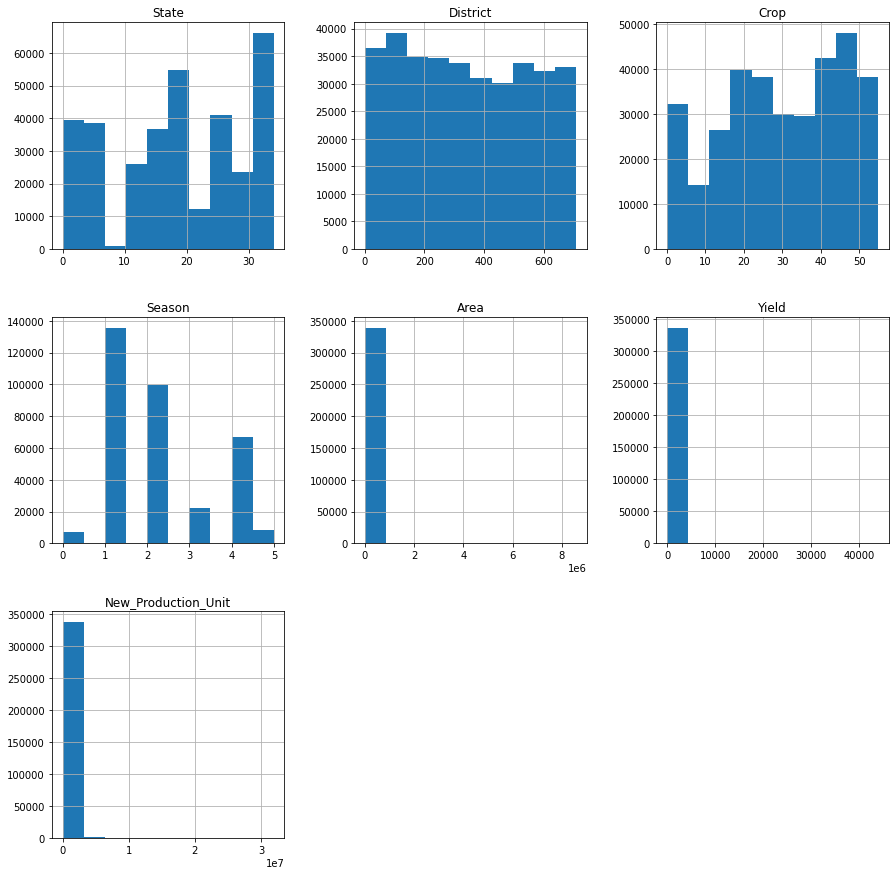

In [ ]:
data.hist(figsize = (15,15))
plt.show()

# Corelation of each feature in dataset

In [ ]:
data.corr()

,State,District,Crop,Season,Area,Yield,New_Production_Unit
State,1.000000,-0.040706,0.008891,-0.042137,0.036176,0.001449,0.028647
District,-0.040706,1.000000,-0.001823,0.001032,-0.023496,0.007645,0.007781
Crop,0.008891,-0.001823,1.000000,0.040711,0.058262,-0.108507,0.017155
Season,-0.042137,0.001032,0.040711,1.000000,-0.046036,0.130238,0.077734
Area,0.036176,-0.023496,0.058262,-0.046036,1.000000,0.000091,0.200569
Yield,0.001449,0.007645,-0.108507,0.130238,0.000091,1.000000,0.326860
New_Production_Unit,0.028647,0.007781,0.017155,0.077734,0.200569,0.326860,1.000000


<AxesSubplot:>

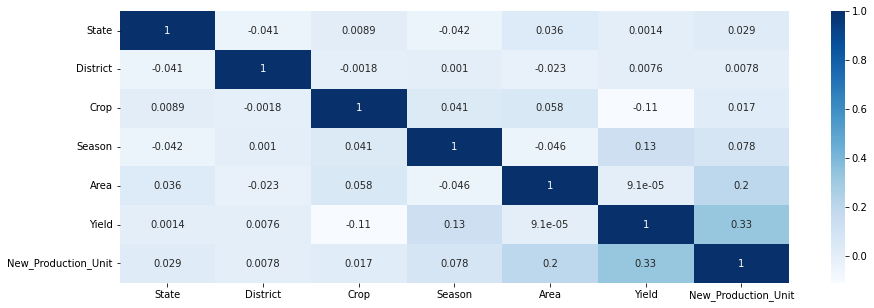

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

In [ ]:
data.head(3)

,State,District,Crop,Year,Season,Area,Yield,New_Production_Unit
0,0,469,0,2001-02,1,1254.0,1.643541,2061.0
1,0,469,0,2002-03,4,1258.0,1.655803,2083.0
2,0,469,0,2003-04,4,1261.0,1.209358,1525.0


# Checking Outlier Using ZSCORE

State                     AxesSubplot(0.125,0.657941;0.227941x0.222059)
District               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Crop                   AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Season                    AxesSubplot(0.125,0.391471;0.227941x0.222059)
Area                   AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Yield                  AxesSubplot(0.672059,0.391471;0.227941x0.222059)
New_Production_Unit          AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

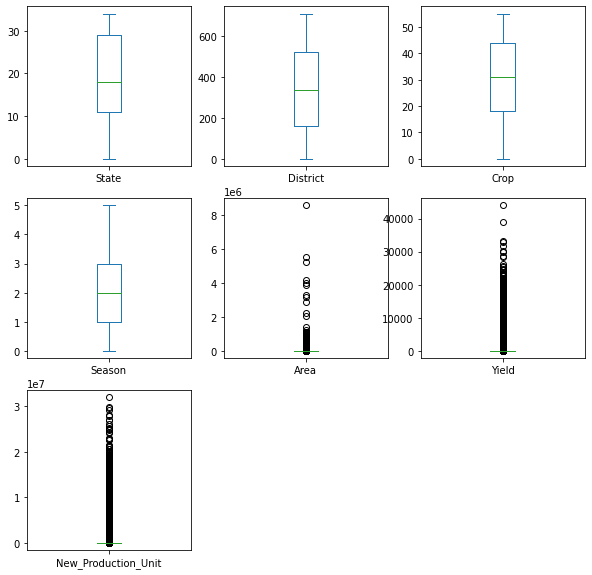

In [ ]:
# Checking For Outliers
data.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

##### New_Production_Unit

In [ ]:
# Calculate the mean and standard deviation
mean_New_Production_Unit = sum(data['New_Production_Unit']) / len(data['New_Production_Unit'])
stddev_New_Production_Unit = stats.tstd(data['New_Production_Unit'])

# Set the desired significance level
alpha = 0.05

# Calculate the critical z-score for the chosen significance level
z_critical = stats.norm.ppf(1 - alpha/2)

# Calculate the threshold value for the z-score
threshold_New_Production_Unit = z_critical * stddev_New_Production_Unit

print("Mean:", mean_New_Production_Unit)
print("Standard deviation:", stddev_New_Production_Unit)
print("Threshold value for z-score:", threshold_New_Production_Unit)


Mean: 62081.90033934198
Standard deviation: 571593.6046713176
Threshold value for z-score: 1120302.8789492082


In [ ]:
z_scores = np.abs((data['New_Production_Unit'] - data['New_Production_Unit'].mean()) / data['New_Production_Unit'].std())

# Identify outliers as data points with z-score greater than a certain threshold
threshold = threshold_New_Production_Unit
outliers = data[z_scores > threshold]

# Print the number of outliers
print(f'There are {len(outliers)} outliers in the data.')

There are 0 outliers in the data.


##### Area

In [ ]:
import scipy.stats as stats

# Calculate the mean and standard deviation
mean_Area = sum(data['Area']) / len(data['Area'])
stddev_Area = stats.tstd(data['Area'])

# Set the desired significance level
alpha = 0.05

# Calculate the critical z-score for the chosen significance level
z_critical = stats.norm.ppf(1 - alpha/2)

# Calculate the threshold value for the z-score
threshold_Area = z_critical * stddev_Area

print("Mean:", mean_Area)
print("Standard deviation:", stddev_Area)
print("Threshold value for z-score:", threshold_Area)


Mean: 11848.818303269292
Standard deviation: 46179.127840848916
Threshold value for z-score: 90509.42740553478


In [ ]:
z_scores = np.abs((data['Area'] - data['Area'].mean()) / data['Area'].std())

# Identify outliers as data points with z-score greater than a certain threshold
threshold = threshold_Area
outliers = data[z_scores > threshold]

# Print the number of outliers
print(f'There are {len(outliers)} outliers in the data.')

There are 0 outliers in the data.


##### Yield

In [ ]:
import scipy.stats as stats

# Calculate the mean and standard deviation
mean_Yield = sum(data['Yield']) / len(data['Yield'])
stddev_Yield = stats.tstd(data['Yield'])

# Set the desired significance level
alpha = 0.05

# Calculate the critical z-score for the chosen significance level
z_critical = stats.norm.ppf(1 - alpha/2)

# Calculate the threshold value for the z-score
threshold_Yield = z_critical * stddev_Yield

print("Mean:", mean_Yield)
print("Standard deviation:", stddev_Yield)
print("Threshold value for z-score:", threshold_Yield)


Mean: 80.84119690411208
Standard deviation: 924.8886926128731
Threshold value for z-score: 1812.748527229568


In [ ]:
z_scores = np.abs((data['Yield'] - data['Yield'].mean()) / data['Yield'].std())

# Identify outliers as data points with z-score greater than a certain threshold
threshold = threshold_Yield
outliers = data[z_scores > threshold]

# Print the number of outliers
print(f'There are {len(outliers)} outliers in the data.')

There are 0 outliers in the data.


# Model Training

In [ ]:
# Putting feature variable to X
X = data.drop(["Yield", "Year"], axis= 1)
#data.drop(columns = ["Production", "Production Units"], inplace = True)

# Putting response variable to y
y = data[['Yield']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [ ]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (237430, 6)
X_test : (101757, 6)
y_train : (237430, 1)
y_test : (101757, 1)


In [ ]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,State,District,Crop,Season,Area,New_Production_Unit,Yield
86087,1,365,25,2,16863.0,139676.0,8.282986
91761,4,439,28,3,183.0,123.0,0.672131
150078,16,673,47,4,2744.0,151194.0,55.099854
49473,4,393,37,2,983.0,904.0,0.919634
57533,16,128,6,4,2524.0,155.0,0.061410


## Linear Regression

In [ ]:
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)
LR_pred = model_LR.predict(X_test)

In [ ]:
r1 = r2_score(y_test,LR_pred)
print("Linear Regression r2 Score ",r1)

Linear Regression r2 Score  0.1352036210892399


In [ ]:
df_test['LR_Prediction']=LR_pred
df_test.head()

,State,District,Crop,Season,Area,New_Production_Unit,Yield,LR Prediction
86087,1,365,25,2,16863.0,139676.0,8.282986,144.291617
91761,4,439,28,3,183.0,123.0,0.672131,148.049590
150078,16,673,47,4,2744.0,151194.0,55.099854,178.806359
49473,4,393,37,2,983.0,904.0,0.919634,6.468899
57533,16,128,6,4,2524.0,155.0,0.061410,370.465068


## Decision Tree

In [ ]:
model_DT = RandomForestRegressor()
model_DT.fit(X_train,y_train)
DT_pred = model_DT.predict(X_test)

<ipython-input-137-3b376b2c39ec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_DT.fit(X_train,y_train)


In [ ]:
r2 = r2_score(y_test,DT_pred)
print("Randomn forest r2 Score ",r2)

Randomn forest r2 Score  0.9740760760589251


In [ ]:
df_test['DT_Prediction']=DT_pred
df_test.head()

,State,District,Crop,Season,Area,New_Production_Unit,Yield,LR Prediction,DT_Prediction
86087,1,365,25,2,16863.0,139676.0,8.282986,144.291617,8.335232
91761,4,439,28,3,183.0,123.0,0.672131,148.049590,0.667615
150078,16,673,47,4,2744.0,151194.0,55.099854,178.806359,57.172134
49473,4,393,37,2,983.0,904.0,0.919634,6.468899,0.926881
57533,16,128,6,4,2524.0,155.0,0.061410,370.465068,0.062308
